# Traffic Signs Detection with YOLOv8: A Comprehensive Guide


<figure>
        <img src="https://storage.googleapis.com/kaggle-datasets-images/4066836/7063599/66e0dcfb8257d5bae8849b55484223ff/dataset-cover.jpg?t=2023-11-27-22-57-41" alt ="Audio Art" style='width:800px;height:500px;'>
        <figcaption>


### Traffic sign detection is crucial for various applications, including autonomous vehicle navigation, traffic rule compliance, road safety training programs, smart city infrastructure, and road network analysis. In this article, we'll explore how to leverage YOLOv8, a state-of-the-art object detection model, to effectively detect and classify traffic signs from a dataset containing images of various traffic signs.

In [1]:
!pip install ultralytics opencv-python-headless matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 22.0 MB/s eta 0:00:0000:01


##  Import Libraries

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

## Set Up Paths

In [3]:
# Define dataset paths
train_images_path = '/kaggle/input/cardetection/car/train/images'
train_labels_path = '/kaggle/input/cardetection/car/train/labels'
valid_images_path = '/kaggle/input/cardetection/car/valid/images'
valid_labels_path = '/kaggle/input/cardetection/car/valid/labels'
test_images_path = '/kaggle/input/cardetection/car/test/images'
test_labels_path = '/kaggle/input/cardetection/car/test/labels'


## Visualize Sample Images

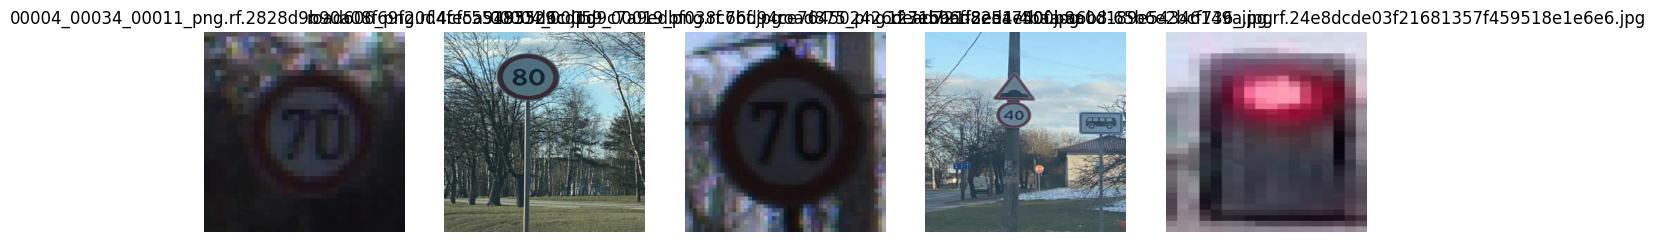

In [4]:
def visualize_sample_images(images_path, num_images=5):
    images = os.listdir(images_path)[:num_images]
    plt.figure(figsize=(15, 7))
    for i, image in enumerate(images):
        img = cv2.imread(os.path.join(images_path, image))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(image)
    plt.show()

visualize_sample_images(train_images_path)

##  Create data.yaml

In [5]:
train: '/kaggle/input/cardetection/car/train/images'
val: '/kaggle/input/cardetection/car/valid/images'

nc: 15  # Number of classes
names: ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']


## Load and train the YOLOv8 model

In [6]:
model = YOLO('yolov8s.pt')  # Using the small variant, you can choose others like yolov8m.pt, yolov8l.pt, etc.

model.train(data='/kaggle/input/cardetection/car/data.yaml', epochs=50, imgsz=640)


100%|██████████| 21.5M/21.5M [00:00<00:00, 195MB/s]


Ultralytics YOLOv8.2.56 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/cardetection/car/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 755k/755k [00:00<00:00, 19.2MB/s]
2024-07-14 09:10:42,290	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-14 09:10:43,528	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 116MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:13<00:00, 269.03it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:03<00:00, 254.90it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.68G     0.8537      3.603      1.181         20        640: 100%|██████████| 221/221 [01:10<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]


                   all        801        944      0.338       0.42       0.34      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.59G     0.7357      1.705      1.084         13        640: 100%|██████████| 221/221 [01:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.00it/s]

                   all        801        944      0.663      0.489      0.523      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.58G     0.7481      1.414      1.082         20        640: 100%|██████████| 221/221 [01:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        801        944       0.74      0.588      0.648      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.61G     0.7222      1.284      1.073         29        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]

                   all        801        944      0.782      0.737       0.81      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.61G     0.7103      1.151      1.058         31        640: 100%|██████████| 221/221 [01:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        801        944      0.827      0.735      0.835      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.58G     0.6925      1.051      1.046         16        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.06it/s]

                   all        801        944      0.887      0.783      0.874      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.61G     0.6726     0.9654      1.034         22        640: 100%|██████████| 221/221 [01:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]

                   all        801        944       0.89      0.763       0.86      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       4.6G     0.6511     0.9075      1.031         13        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.06it/s]

                   all        801        944      0.873      0.773       0.87      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.59G     0.6463     0.8864      1.023         23        640: 100%|██████████| 221/221 [01:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]

                   all        801        944      0.888       0.83      0.898      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.57G     0.6411     0.8658      1.017         22        640: 100%|██████████| 221/221 [01:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.07it/s]

                   all        801        944      0.916      0.828      0.912      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.63G     0.6357      0.811       1.01         20        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.03it/s]

                   all        801        944      0.881      0.861      0.917      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.61G     0.6223     0.7954      1.015         21        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.06it/s]

                   all        801        944      0.943      0.841       0.93      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.59G     0.6218      0.783      1.007         22        640: 100%|██████████| 221/221 [01:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.07it/s]

                   all        801        944      0.935      0.841      0.924      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.56G     0.6112     0.7628     0.9982         25        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.04it/s]

                   all        801        944      0.932       0.86      0.929      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.62G     0.6043     0.7353      0.994         27        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]

                   all        801        944      0.918      0.871      0.937      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.61G     0.5977     0.7324     0.9925         13        640: 100%|██████████| 221/221 [01:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.07it/s]

                   all        801        944      0.943      0.851       0.94      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       4.6G     0.5968     0.7102     0.9917         28        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.03it/s]

                   all        801        944      0.948      0.864      0.938      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.56G     0.5828     0.6989     0.9908         18        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.12it/s]

                   all        801        944      0.928      0.897      0.949      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.62G     0.5843     0.6925     0.9876         18        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]

                   all        801        944      0.913       0.88      0.938      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       4.6G     0.5791     0.6585     0.9853         21        640: 100%|██████████| 221/221 [01:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.02it/s]

                   all        801        944      0.951      0.884      0.953      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       4.6G     0.5769     0.6505     0.9791         19        640: 100%|██████████| 221/221 [01:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.06it/s]

                   all        801        944      0.924      0.891       0.95      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.57G       0.57     0.6344     0.9837         29        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.00it/s]

                   all        801        944      0.918       0.88      0.941      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.61G     0.5659     0.6322     0.9779         28        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.04it/s]

                   all        801        944       0.93      0.887      0.953      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.61G     0.5695     0.6258     0.9762         23        640: 100%|██████████| 221/221 [01:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.01it/s]

                   all        801        944      0.945      0.886      0.954      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.59G     0.5539     0.6097     0.9723         23        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.05it/s]

                   all        801        944      0.942        0.9      0.956      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.56G     0.5591        0.6     0.9679         21        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]

                   all        801        944      0.938      0.902       0.96      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.61G     0.5336      0.596     0.9591         15        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.12it/s]

                   all        801        944      0.945      0.912       0.96       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.61G      0.538     0.5794     0.9636         23        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.06it/s]

                   all        801        944      0.943      0.923      0.965      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       4.6G     0.5411     0.5756     0.9655         27        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]

                   all        801        944      0.956      0.907      0.966      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.57G     0.5416      0.551     0.9623         21        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.09it/s]

                   all        801        944      0.928      0.923      0.959      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.62G     0.5258     0.5494     0.9617         21        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.06it/s]

                   all        801        944      0.947      0.918      0.957      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.61G     0.5291     0.5362     0.9624         18        640: 100%|██████████| 221/221 [01:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.97it/s]

                   all        801        944      0.964      0.905      0.962      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.6G     0.5226     0.5403     0.9568         29        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]

                   all        801        944      0.934      0.908      0.955      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.58G     0.5283     0.5259     0.9563         21        640: 100%|██████████| 221/221 [01:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]

                   all        801        944      0.947      0.916      0.967      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.61G     0.5124     0.5202     0.9609         25        640: 100%|██████████| 221/221 [01:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]

                   all        801        944       0.95      0.938      0.967      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       4.6G     0.5081     0.5212     0.9505         24        640: 100%|██████████| 221/221 [01:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]

                   all        801        944      0.952      0.912      0.965      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.61G     0.5122     0.5075     0.9527         21        640: 100%|██████████| 221/221 [01:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]

                   all        801        944      0.954      0.912       0.96       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.57G      0.502     0.4951     0.9497         25        640: 100%|██████████| 221/221 [01:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.02it/s]

                   all        801        944       0.96      0.923      0.968       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.62G     0.4994     0.4816     0.9441         20        640: 100%|██████████| 221/221 [01:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]

                   all        801        944      0.944      0.934      0.966      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.59G      0.498     0.4913     0.9486         15        640: 100%|██████████| 221/221 [01:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.05it/s]

                   all        801        944      0.945      0.936      0.969      0.841


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.6G     0.5009     0.3105      0.911         13        640: 100%|██████████| 221/221 [01:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.98it/s]

                   all        801        944      0.949      0.932      0.968      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.58G     0.4997     0.3015     0.9055         14        640: 100%|██████████| 221/221 [01:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.05it/s]

                   all        801        944      0.953       0.94      0.971      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.63G     0.4904     0.2962     0.9042         11        640: 100%|██████████| 221/221 [01:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.02it/s]

                   all        801        944      0.954      0.942      0.971      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       4.6G     0.4822      0.293     0.9026         10        640: 100%|██████████| 221/221 [01:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.05it/s]

                   all        801        944      0.955      0.944       0.97       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.59G     0.4782     0.2801     0.8958         11        640: 100%|██████████| 221/221 [01:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]

                   all        801        944      0.964      0.934      0.969       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.58G     0.4718     0.2794     0.9005         10        640: 100%|██████████| 221/221 [01:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.05it/s]

                   all        801        944      0.952      0.935      0.969      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.63G     0.4701     0.2775     0.8994         13        640: 100%|██████████| 221/221 [01:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.00it/s]

                   all        801        944      0.955      0.941      0.971      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.61G     0.4642     0.2685     0.8986         14        640: 100%|██████████| 221/221 [01:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]

                   all        801        944      0.966      0.932      0.972       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.59G     0.4585     0.2607     0.8914         15        640: 100%|██████████| 221/221 [01:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.04it/s]

                   all        801        944      0.955      0.947      0.971       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.56G     0.4591     0.2606     0.8895         14        640: 100%|██████████| 221/221 [01:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.04it/s]

                   all        801        944      0.956      0.946      0.972       0.85



50 epochs completed in 1.021 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.56 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.02it/s]


                   all        801        944      0.956      0.946      0.972       0.85
           Green Light         87        122      0.889       0.82      0.883       0.57
             Red Light         74        108      0.816      0.781      0.836      0.517
       Speed Limit 100         52         52          1      0.998      0.995      0.908
       Speed Limit 110         17         17      0.977          1      0.995      0.936
       Speed Limit 120         60         60      0.985      0.983      0.993      0.923
        Speed Limit 20         56         56      0.965      0.982      0.987      0.877
        Speed Limit 30         71         74      0.949      0.973      0.993      0.932
        Speed Limit 40         53         55       0.94      0.982      0.993      0.897
        Speed Limit 50         68         71      0.971      0.937      0.983      0.883
        Speed Limit 60         76         76      0.973      0.957      0.986      0.911
        Speed Limit 7

lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▃▄▆▇▇▇▇▇█▇█████████████████████████████
metrics/mAP50-95(B),▁▃▄▆▇▆▆▇▇▇▇▇▇▇▇▇▇▇██████████████████████
metrics/precision(B),▁▅▅▆▇▇▇▇▇██████▇█▇██████████████████████
metrics/recall(B),▁▂▃▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇██▇█▇▇█████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▆▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fc95d1df880>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

## Validate the model


In [7]:
metrics = model.val()
print(metrics)

Ultralytics YOLOv8.2.56 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 751.68it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.49it/s]


                   all        801        944      0.957      0.947      0.974      0.852
           Green Light         87        122      0.898      0.828      0.897      0.574
             Red Light         74        108      0.826       0.79      0.846      0.527
       Speed Limit 100         52         52          1      0.998      0.995       0.91
       Speed Limit 110         17         17      0.977          1      0.995      0.936
       Speed Limit 120         60         60      0.985      0.983      0.993      0.923
        Speed Limit 20         56         56      0.965      0.982      0.987      0.877
        Speed Limit 30         71         74      0.949      0.973      0.993      0.932
        Speed Limit 40         53         55      0.941      0.982      0.993      0.897
        Speed Limit 50         68         71      0.971      0.936      0.983      0.883
        Speed Limit 60         76         76      0.973      0.957      0.986       0.91
        Speed Limit 7

## Inference on Test Images


image 1/1 /kaggle/input/cardetection/car/test/images/000664_jpg.rf.882fdd90b90c7f1af1fc37a7467443cf.jpg: 640x640 1 Speed Limit 50, 1 Speed Limit 80, 9.8ms
Speed: 3.2ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/cardetection/car/test/images/000822_jpg.rf.63b8e6ec737487b4e7e9e2ed48754226.jpg: 640x640 1 Speed Limit 90, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/cardetection/car/test/images/001051_jpg.rf.bb8152d7d7c35ed73bfc9239185f9087.jpg: 640x640 2 Speed Limit 100s, 1 Speed Limit 80, 7.9ms
Speed: 2.5ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/cardetection/car/test/images/00014_00023_00018_png.rf.7f4df748842e9a2b90d343c5612ff812.jpg: 640x640 1 Stop, 7.9ms
Speed: 2.4ms preprocess, 7.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/inpu

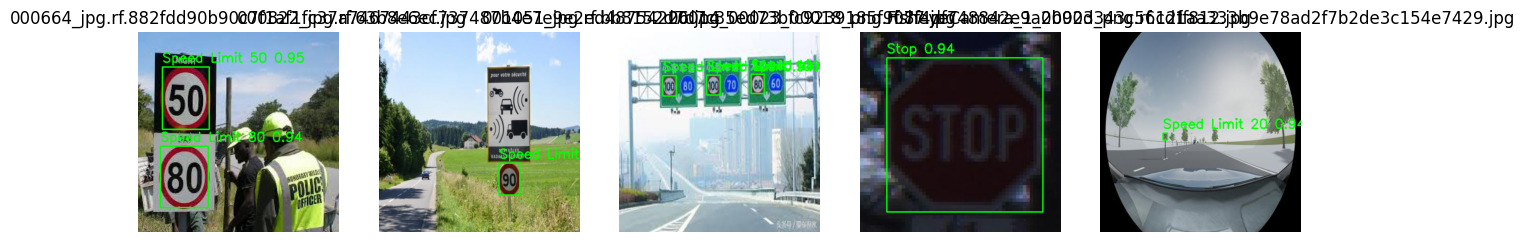

In [10]:
def inference_and_visualize(model, images_path, num_images=5):
    images = os.listdir(images_path)[:num_images]
    plt.figure(figsize=(15, 7))
    for i, image in enumerate(images):
        img_path = os.path.join(images_path, image)
        results = model(img_path)  # Perform inference
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Draw bounding boxes on the image
        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                label = result.names[int(box.cls[0])]
                confidence = box.conf[0]
                color = (0, 255, 0)  # Green for bounding boxes
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                cv2.putText(img, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(image)
    plt.show()

inference_and_visualize(model, test_images_path)